<a href="https://colab.research.google.com/github/AndrewNewton13/Learning/blob/main/Transfer_Learning_Part_2_Fine_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Transfer Learning with TensorFlow Part 2: Fine-tuning

In [ ]:
# Check if we're using a GPU
!nvidia-smi

Sat Jul 24 04:52:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import the helper functions we've been using
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-07-24 04:52:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-24 04:52:19 (111 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import helper functions we're going to use in this notebook
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [ ]:
# When Colab times out it will delete helper_functions

In [ ]:
# Let's get some data
# Use the pretrained models within tf.keras.applications

In [ ]:
# Get 10% of training data of 10 classes of Food101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2021-07-24 04:52:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.188.48, 142.251.45.16, 142.250.81.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.188.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   241MB/s    in 0.7s    

2021-07-24 04:52:21 (241 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data('10_food_classes_10_percent.zip')

In [ ]:
# Check out how many images and subdirectories are in our dataset
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
# Create training and test directory paths
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf

IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode='categorical',
                                                                            batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
# Check out the class names of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# See an example of a batch of data
for images, labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[3.50000000e+01 3.10000000e+01 2.80000000e+01]
   [3.59540825e+01 3.19540825e+01 2.89540825e+01]
   [3.70000000e+01 3.30000000e+01 3.00000000e+01]
   ...
   [4.22142639e+01 4.02142639e+01 4.12142639e+01]
   [4.03316269e+01 3.83316269e+01 3.93316269e+01]
   [3.92295799e+01 3.72295799e+01 3.82295799e+01]]

  [[3.60000000e+01 3.20000000e+01 2.90000000e+01]
   [3.60663261e+01 3.20663261e+01 2.90663261e+01]
   [3.72704086e+01 3.32704086e+01 3.02704086e+01]
   ...
   [4.22703896e+01 4.02703896e+01 4.12703896e+01]
   [4.10663261e+01 3.90663261e+01 4.00663261e+01]
   [4.00714302e+01 3.80714302e+01 3.90714302e+01]]

  [[3.67857132e+01 3.27857132e+01 2.97857151e+01]
   [3.69846954e+01 3.29846954e+01 2.99846935e+01]
   [3.81683693e+01 3.41683693e+01 3.11683674e+01]
   ...
   [4.30000000e+01 4.10000000e+01 4.20000000e+01]
   [4.19846916e+01 3.99846916e+01 4.09846916e+01]
   [4.17857132e+01 3.97857132e+01 4.07857132e+01]]

  ...

  [[1.00000000e+01 1.00000000e+01 1.00000000e+01]
   [1

In [ ]:
# Model 0: First time using Keras Functional API

In [ ]:
# 1. Create a baes model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (the pre-trained patterns aren't changing during training)
base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape=(224,224,3),name='input_layer')

# 4. If using ResNet50V2 you will need to normalize inputs (you don't have to for EfficientNet)
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10,activation='softmax',name='output_layer')(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs,outputs)

# 9. Compile the model
model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')
# 10. Fit the model
model_0_history = model_0.fit(train_data_10_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_10_percent),
                              validation_data=test_data,
                              validation_steps=len(test_data),
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                     experiment_name="10_percent_feature_extraction")])

16711680/16705208 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20210724-045233
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 48s 561ms/step - loss: 1.8860 - accuracy: 0.4040 - val_loss: 1.3379 - val_accuracy: 0.7044
Epoch 2/5
24/24 [==============================] - 11s 441ms/step - loss: 1.1555 - accuracy: 0.7453 - val_loss: 0.9236 - val_accuracy: 0.8024
Epoch 3/5
24/24 [==============================] - 11s 439ms/step - loss: 0.8477 - accuracy: 0.7973 - val_loss: 0.7498 - val_accuracy: 0.8240
Epoch 4/5
24/24 [==============================] - 11s 451ms/step - loss: 0.6889 - accuracy: 0.8400 - val_loss: 0.6641 - val_accuracy: 0.8316
Epoch 5/5
24/24 [==============================] - 11s 460ms/step - loss: 0.5928 - accuracy: 0.8587 - val_loss: 0.6077 - val_accuracy: 0.8432


In [ ]:
# Evaluate on the full test dataset
model_0.evaluate(test_data)

79/79 [==============================] - 9s 105ms/step - loss: 0.6077 - accuracy: 0.8432


[0.6077381372451782, 0.8432000279426575]

In [ ]:
# Check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print (layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [ ]:
# Get a summary of the base model
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

In [ ]:
# How about a summary of our whole model?
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


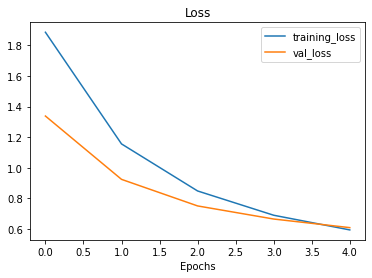

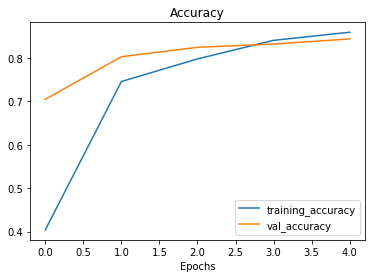

In [ ]:
# Check out our model's training curves
plot_loss_curves(model_0_history)

In [ ]:
# Getting a feature vector from a trained model

In [ ]:
# Let's demonstrate the Global Average Pooling 2D Layer

In [ ]:
# Define the input shape
input_shape = (1,4,4,3)

# Create a random tensor 
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}")

# Pass the random tensor through a Global Average Pooling2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"Global average pooled tensor: {global_average_pooled_tensor}")

# Check the shape of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of the 2d tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]
Global average pooled tensor: [[-0.09368646 -0.45840448 -0.2885598 ]]
Shape of input tensor: (1, 4, 4, 3)
Shape of the 2d tensor: (1, 3)


In [ ]:
# Let's replicate the GlobalAveragePooled2D layer
tf.reduce_mean(input_tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [ ]:
# Try to do the same thing but with the GlobalMaxPool2D 
input_tensor_2 = tf.random.normal(input_shape)
maxpool_tensor = tf.keras.layers.GlobalMaxPool2D()(input_tensor_2)
print(f"Shape of input_tensor_2: {input_tensor_2.shape}")
print(f"Shape of max pool tensor: {maxpool_tensor.shape}")

Shape of input_tensor_2: (1, 4, 4, 3)
Shape of max pool tensor: (1, 3)


Running a series of transfer learning experiments

1. 'model_1' - use feature etraction transfer learning with 1%
of the training data with data augmentation
2. 'model_2' - use feature extraction transfer learning with 10% 
of the training with data augmentation
3. 'model_3' - use fine-tuning transfer learning on 10% of the 
training data with data augmentation
4. 'model_4' - use fine-tuning transfer learning on 100% of the
training data

In [ ]:
# Download and unzip data - preprocessed from Food101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2021-07-24 04:54:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.115.128, 172.253.122.128, 172.217.164.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.115.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   216MB/s    in 0.6s    

2021-07-24 04:54:24 (216 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
# Create training and test dir
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir_1_percent = "10_food_classes_1_percent/test"

In [ ]:
# How many images are we working with?
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'

In [ ]:
# Setup data loaders 
IMG_SIZE = (224,224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode='categorical',
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=32)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE,
                                                                batch_size=32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


Adding Data Augmentation right into the model -

We can use the layers inside:
tf.keras.layers.experiment.preprocessing()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create data augmentation stag with horizontal flipping, rotations, zooms, etc
data_augmentation = keras.Sequential([
                                      preprocessing.RandomFlip("horizontal"),
                                      preprocessing.RandomRotation(0.2),
                                      preprocessing.RandomZoom(0.2),
                                      preprocessing.RandomHeight(0.2),
                                      preprocessing.RandomWidth(0.2),
                                      ], name='data_augmentation')

tf.Tensor(
[[[[186.       142.       111.      ]
   [186.       142.       112.62564 ]
   [186.       142.       113.688034]
   ...
   [134.       108.31198  111.31198 ]
   [134.       109.       112.37439 ]
   [134.       109.       114.      ]]

  [[186.       142.       112.7     ]
   [187.38179  143.38179  115.01654 ]
   [189.45448  145.45448  117.99252 ]
   ...
   [134.       108.31198  111.31198 ]
   [134.       109.       112.21527 ]
   [134.       109.       113.15    ]]

  [[186.       142.       113.      ]
   [189.45448  144.84488  116.04808 ]
   [191.79808  147.04808  118.470085]
   ...
   [134.       108.31198  111.31198 ]
   [134.       109.       112.187195]
   [134.       109.       113.      ]]

  ...

  [[175.25     152.25     146.25    ]
   [175.0468   152.0468   146.0468  ]
   [175.       152.       146.      ]
   ...
   [ 53.68802   50.        64.      ]
   [ 52.859604  50.0468    63.859604]
   [ 52.25      50.25      63.25    ]]

  [[176.       153.       146.85  

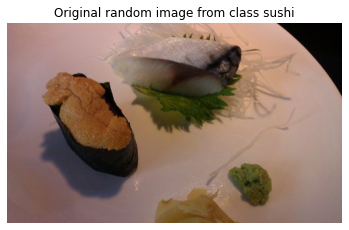

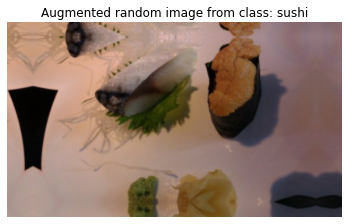

In [ ]:
# View a random image and compare it to its augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

# Read in the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"Original random image from class {target_class}")
plt.axis(False)

# Now let's plot our augmented random image
augmented_img = data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img/255))
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False)
print(augmented_img)

## Model 1: Feature extraction transfer learningon 1% of the data with data augmentation

In [ ]:
# Setup input shape and base model, freeze the base model layers
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name='input_layer')

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model the inputs (after they have been augmented) and don't train it
x = base_model(x, training=False)

# Pool the output features of the base_model
x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

# Put a dense layer as the output
outputs = layers.Dense(10,activation='softmax',name='output_layer')(x)

# Make a model using the inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile model_1
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

# Fit model_1
history_1_percent = model_1.fit(train_data_1_percent,
                                epochs=5,
                                steps_per_epoch=len(train_data_1_percent),
                                validation_data=test_data,
                                validation_steps=int(0.25*len(test_data)),
                                # Track model training logs
                                callbacks=[create_tensorboard_callback(
                                    dir_name="transfer_learning",
                                    experiment_name="1_percent_data_aug"
                                )])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20210724-045428


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/5
3/3 [==============================] - 11s 3s/step - loss: 2.4098 - accuracy: 0.1000 - val_loss: 2.2188 - val_accuracy: 0.1809
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.1627 - accuracy: 0.3143 - val_loss: 2.0984 - val_accuracy: 0.2434
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9407 - accuracy: 0.4000 - val_loss: 1.9939 - val_accuracy: 0.3059
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.8518 - accuracy: 0.4286 - val_loss: 1.8831 - val_accuracy: 0.3668
Epoch 5/5
3/3 [==============================] - 3s 2s/step - loss: 1.6169 - accuracy: 0.6286 - val_loss: 1.8203 - val_accuracy: 0.4112


In [ ]:
# Check out the model summary
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
# Evaluate on the full test_data set
model_1.evaluate(test_data)

79/79 [==============================] - 9s 108ms/step - loss: 1.8082 - accuracy: 0.4300


[1.808229923248291, 0.4300000071525574]

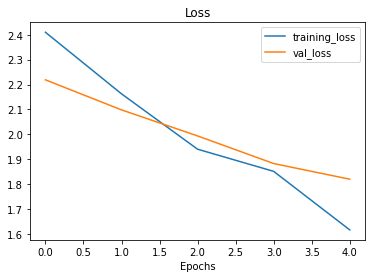

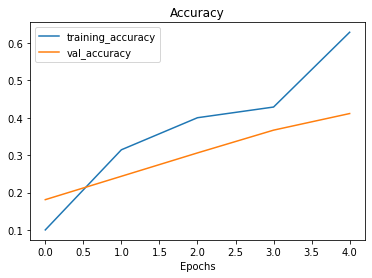

In [ ]:
# Check out the loss curves
plot_loss_curves(history_1_percent)

# Model 2: Feature extraction transfer learning on 10% of the data with augmented data

In [ ]:
# unzip_data(10_food_classes_10_percent)

train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir_10_percent = "10_food_classes_10_percent/test"

In [ ]:
# How many images in our directory?
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [ ]:
# Preprocess the data
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode='categorical',
                                                                            image_size=(224,224))
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir_10_percent,
                                                                label_mode='categorical',
                                                                image_size=(224,224))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Build the data augmentation layer
data_augmentation = tf.keras.Sequential([
                                preprocessing.RandomFlip("horizontal"),
                                preprocessing.RandomHeight(0.2),
                                preprocessing.RandomWidth(0.2),
                                preprocessing.RandomZoom(0.2)

])

In [ ]:
# Set a place for CheckPoint to save
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

In [ ]:
# Setup the input shape and base model
input_shape = (224,224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation as a layer
x = data_augmentation(inputs)

# Give the base model the augmented inputs
x = base_model(x,training=False)

# Pool the output features of the base model
x = layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)

# Create the output layer
outputs = layers.Dense(10,activation='softmax',name='output_layer')(x)

# Make model_2
model_2 = keras.Model(inputs,outputs)

# Compile model_2
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

# Fit model_2
history_model_2 = model_2.fit(train_data_10_percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_10_percent),
                              validation_data=test_data,
                              validation_steps=int(0.25 * len(test_data)),
                              callbacks=[tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                                           save_weights_only=True,
                                                                           save_best_only=False,
                                                                           save_freq="epoch",
                                                                           verbose=1),
                                         create_tensorboard_callback(dir_name="transfer_learning",
                                         experiment_name="data_aug_10_percent")])

Saving TensorBoard log files to: transfer_learning/data_aug_10_percent/20210724-045510
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 19s 602ms/step - loss: 1.9924 - accuracy: 0.3373 - val_loss: 1.4098 - val_accuracy: 0.6711

Epoch 00001: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
Epoch 2/5
24/24 [==============================] - 11s 427ms/step - loss: 1.2461 - accuracy: 0.7187 - val_loss: 0.9765 - val_accuracy: 0.7829

Epoch 00002: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
Epoch 3/5
24/24 [==============================] - 11s 433ms/step - loss: 0.9330 - accuracy: 0.7693 - val_loss: 0.8129 - val_accuracy: 0.7796

Epoch 00003: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
Epoch 4/5
24/24 [==============================] - 10s 402ms/step - loss: 0.7648 - accuracy: 0.8293 - val_loss: 0.7002 - val_accuracy: 0.8059

Epoch 00004: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
Epoch 5/5
24/24 [==============================] - 9s 376ms/step - loss: 0.6722 - accuracy: 0.8320 - val_l

In [ ]:
# Check model_2 results on all test_data
results_10_percent_data_aug = model_2.evaluate(test_data)

79/79 [==============================] - 9s 108ms/step - loss: 0.6361 - accuracy: 0.8288


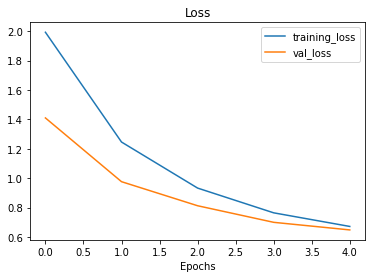

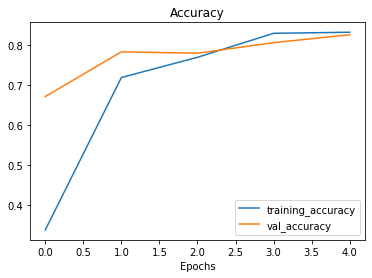

In [ ]:
# Plot the loss curve
plot_loss_curves(history_model_2)

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


# Loading in checkpointed weights

In [ ]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [ ]:
# Evalute model_2 with loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 9s 108ms/step - loss: 0.6361 - accuracy: 0.8288


In [ ]:
# If the results are the same then everything has worked
results_10_percent_data_aug == loaded_weights_model_results

False

In [ ]:
results_10_percent_data_aug

[0.63612300157547, 0.8288000226020813]

In [ ]:
loaded_weights_model_results

[0.6361231207847595, 0.8288000226020813]

In [ ]:
# Check to see if loaded model results are very close to our previous non-loaded model results
import numpy as np 
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

In [ ]:
# Check the difference between the two results
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[-1.1920929e-07  0.0000000e+00]


# Model 3: Fine-tuning an already existing model

In [ ]:
# Check out the layers in model_2
model_2.layers

In [ ]:
# Are these layers trainable?
for layer in model_2.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f4decf06e10> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f4cf14b5510> True
<tensorflow.python.keras.engine.functional.Functional object at 0x7f4cf115ac10> False
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7f4cf10fecd0> True
<tensorflow.python.keras.layers.core.Dense object at 0x7f4cf1285c50> True


In [ ]:
# What layers are in the base model and are they trainable?
for i, layer in enumerate(model_2.layers[2].layers):
  print(i,layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
# How many trainable variables are in our base model?
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
# To begin fine-tuning, let's start by setting the last 10 layers as trainable
base_model.trainable = True

# Freeze all layers except last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False 

In [ ]:
# We have to recompile the entire model now that we unfroze some layers
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lower the lr by 10x when fine-tuning
                metrics='accuracy')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Check which layers a tunable (trainable)
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
# How many layers are trainable?
print(len(model_2.trainable_variables))

12


In [ ]:
# Load in the data
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir_10_percent = "10_food_classes_10_percent/test"

In [ ]:
# Preprocess the data
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode='categorical',
                                                                            image_size=(224,224))
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_10_percent,
                                                                           label_mode='categorical',
                                                                           image_size=(224,224))

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Build the data augmentation layer
data_augmentation = tf.keras.Sequential([
                                         preprocessing.RandomFlip("horizontal"),
                                         preprocessing.RandomHeight(0.2),
                                         preprocessing.RandomWidth(0.2),
                                         preprocessing.RandomZoom(0.2)
])

In [ ]:
 # Fine tune for another 5 epochs
 fine_tune_epochs = 10

 # Refit the model (same as model_2 except with more trainable layers)
 history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                              epochs = fine_tune_epochs,
                                              steps_per_epoch=len(train_data_10_percent),
                                              validation_data=test_data,
                                              validation_steps=int(.25 * len(test_data)),
                                              initial_epoch=history_model_2.epoch[-1], # start training from previous last epoch
                                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                     experiment_name="10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20210724-052932
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 20s 539ms/step - loss: 0.5556 - accuracy: 0.8440 - val_loss: 0.5479 - val_accuracy: 0.8092
Epoch 6/10
24/24 [==============================] - 9s 384ms/step - loss: 0.4231 - accuracy: 0.8680 - val_loss: 0.4777 - val_accuracy: 0.8322
Epoch 7/10
24/24 [==============================] - 9s 384ms/step - loss: 0.3439 - accuracy: 0.8907 - val_loss: 0.4983 - val_accuracy: 0.8273
Epoch 8/10
24/24 [==============================] - 9s 382ms/step - loss: 0.3102 - accuracy: 0.9227 - val_loss: 0.4688 - val_accuracy: 0.8536
Epoch 9/10
24/24 [==============================] - 9s 375ms/step - loss: 0.2690 - accuracy: 0.9267 - val_loss: 0.4566 - val_accuracy: 0.8372
Epoch 10/10
24/24 [==============================] - 8s 341ms/step - loss: 0.2253 - accuracy: 0.9440 - val_loss: 0.4588 - val_accuracy: 0.8355


In [ ]:
# Evaluate the fine-tuned model's results
results__fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 9s 106ms/step - loss: 0.4424 - accuracy: 0.8432


In [ ]:
# Check the results from model_2 (feature extraction model)
results_10_percent_data_aug

[0.63612300157547, 0.8288000226020813]

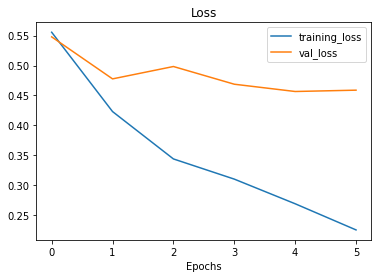

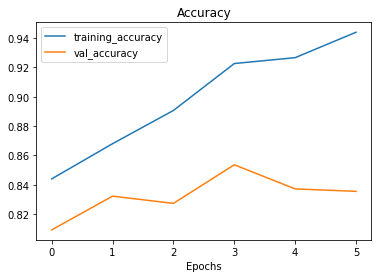

In [ ]:
# Check out the loss curves
plot_loss_curves(history_fine_10_percent_data_aug)

In [ ]:
# Let's create a function to compare training histories
def compare_histories(original_history, new_history, initial_epochs):
  """
  Compares two TensorFlow History objects.
  """

  # Get original history measurements
  acc = original_history.history['accuracy']
  loss = original_history.history['loss']

  val_acc = original_history.history['val_accuracy']
  val_loss = original_history.history['val_loss']

  # Combine original history metrics with new_history metrics
  total_acc = acc + new_history.history['accuracy']
  total_loss = loss + new_history.history['loss']

  total_val_acc = val_acc + new_history.history['val_accuracy']
  total_val_loss = val_loss + new_history.history['val_loss']

  # Make plots for accuracy
  plt.figure(figsize=(10,10))
  plt.subplot(2,1,1)
  plt.plot(total_acc,label='Training Accuracy')
  plt.plot(total_val_acc,label='Val Accuracy')
  plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='lower right')
  plt.title("Training and Validation Accuracy")

  # Make plots for loss
  plt.figure(figsize=(10,10))
  plt.subplot(2,1,2)
  plt.plot(total_loss,label='Training Loss')
  plt.plot(total_val_loss,label='Val Loss')
  plt.plot([initial_epochs-1,initial_epochs-1], plt.ylim(), label='Start Fine Tuning')
  plt.legend(loc='upper right')
  plt.title("Training and Validation Loss")

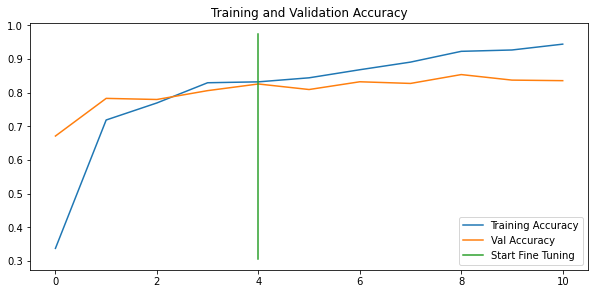

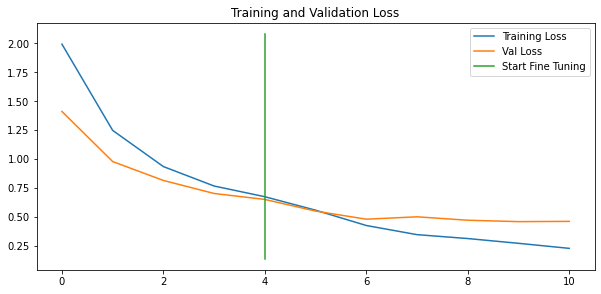

In [ ]:
compare_histories(history_model_2,history_fine_10_percent_data_aug,initial_epochs=5)

# Model 4: Fine-tuning an existing model on all of the training data

In [ ]:
# Download and unzip the 10 classes of Food101 data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2021-07-24 05:49:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 172.217.15.112, 172.217.164.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   202MB/s    in 2.5s    

2021-07-24 05:49:25 (202 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# Set up training and test dir
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [ ]:
# How many images are we working with now?
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 

In [ ]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                               label_mode='categorical',
                                                                               image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Revert the fine-tuned model back to the Checkpoint weights
# Start by loading weights from checkpoints
model_2.load_weights(filepath=checkpoint_path)

In [ ]:
# Let's evaluate model_2 now 
model_2.evaluate(test_data)

79/79 [==============================] - 9s 105ms/step - loss: 0.6361 - accuracy: 0.8288


False

In [ ]:
# Compare the saved results to evaluated model_2 to ensure previous weights were loaded
results_10_percent_data_aug

[0.63612300157547, 0.8288000226020813]

In [ ]:
# One last step to ensure previous weights were loaded
import numpy as np 
np.isclose(model_2.evaluate(test_data),results_10_percent_data_aug)

79/79 [==============================] - 9s 109ms/step - loss: 0.6361 - accuracy: 0.8288


array([ True,  True])

In [ ]:
# Check which layers are tunable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 sequential True
2 efficientnetb0 True
3 global_average_pooling_layer True
4 output_layer True


In [ ]:
# Let's drill into our base model and see what layers are trainable
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number,layer.name,layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
# Compile the model now that we have changed the weights
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics='accuracy')

In [ ]:
# Continue to train and fine-tune the model to our data (100% of training data)
fine_tune_epochs = 10

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=10,
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           initial_epoch=history_model_2.epoch[-1],
                                           callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                      experiment_name="full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20210724-061613
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 51s 196ms/step - loss: 0.6125 - accuracy: 0.8039 - val_loss: 0.3998 - val_accuracy: 0.8717
Epoch 6/10
235/235 [==============================] - 56s 238ms/step - loss: 0.4817 - accuracy: 0.8423 - val_loss: 0.3612 - val_accuracy: 0.8734
Epoch 7/10
235/235 [==============================] - 56s 238ms/step - loss: 0.4132 - accuracy: 0.8660 - val_loss: 0.3514 - val_accuracy: 0.8865
Epoch 8/10
235/235 [==============================] - 52s 220ms/step - loss: 0.3632 - accuracy: 0.8796 - val_loss: 0.3624 - val_accuracy: 0.8832
Epoch 9/10
235/235 [==============================] - 46s 195ms/step - loss: 0.3237 - accuracy: 0.8983 - val_loss: 0.3075 - val_accuracy: 0.8997
Epoch 10/10
235/235 [==============================] - 46s 195ms/step - loss: 0.2892 - accuracy: 0.9088 - val_loss: 0.3175 - val_accuracy: 0.8997


In [ ]:
# Let's evaluate on all of the test data
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 9s 105ms/step - loss: 0.2850 - accuracy: 0.9060


[0.28504636883735657, 0.906000018119812]

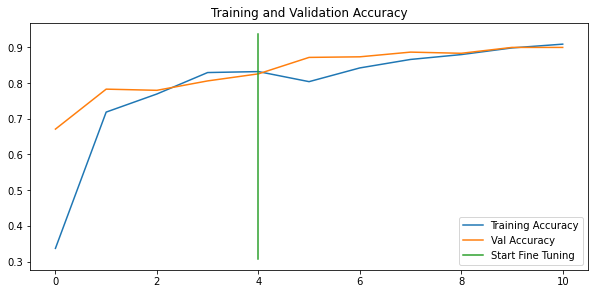

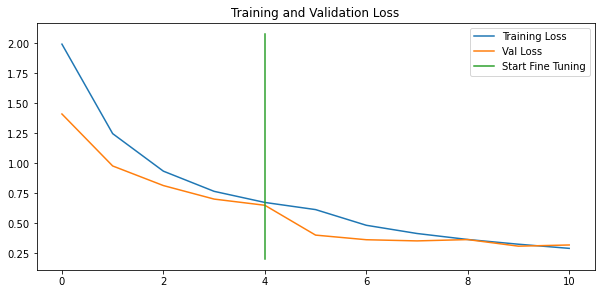

In [ ]:
# How did fine-tuning go with more data?
compare_histories(original_history=history_model_2,
                  new_history=history_fine_10_classes_full,
                  initial_epochs=5)

# Viewing our experiment data on TensorBoard

Remember, everything uploaded to TensorBoard is public information.

In [ ]:
# View tensorboard logs of transfer learning modeling experiments
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./transfer_learning/  \
  --name "Transfer Learning Experiments with 10 Food101 Classes" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning." \
  --one_shot # exits the uploader once its finished uploading

2021-07-24 06:31:58.283295: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%